# 공공재 모형 - 전력계약

## 사용자 편익에 대해서 생각해보자.
 - 단일 계약에서의 사용자 편익은 어떤 것으로 생각할 수 있을까?
 - 기본적으로 사용료 일것이다.
 - 하지만 이 사용료에 따른 그들의 선호도를 편익으로 적용해야 한다.
 - 테스트 데이터 : 398 가구의 6월 데이터의 25% 30% 구간을 이용한다.
 - 가정 1. 종합계약에 유리한 가구들이 있지만, 단일계약을 이용할 경우
 - 가정 2. 사회구성원은 A,B 두개로 나눈다. A는 단일계약의 분리한 가구들, B는 단일계약에 유리한 가구들

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from src.db import *
from src.objects import *
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import random as ran

pd.set_option("display.max_rows", 999)

plt.rcParams['figure.figsize'] = 15.7, 13.27
plt.rcParams['font.family'] = 'AppleGothic'

In [3]:
clean_col_1 = [
    # Meter
    'APT METER','HOUSEHOLD METER','PUBLIC METER','PUBLIC PERCENTAGE',
    # Total
    '종합계약 Total','종합계약 평균청구금액','단일계약 Total','단일계약 평균청구금액',
    # Comprehensive 
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)','종합계약 최소요금 가구 (최종청구금액)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)',
        # MAX
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)','종합계약 최대요금 가구 (최종청구금액)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)',

    # Single
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)','단일계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)',
        # MAX
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)','단일계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)',
]
clean_col_1_ext_1 = [
    # Meter
    'APT METER','PUBLIC METER','종합계약 공동설비요금','단일계약 공동설비요금','종합계약 가구요금 Total','단일계약 가구요금 Total',
    # Total
    '종합계약 Total','단일계약 Total'
]

# 종합계약 비교
clean_col_2 = [
    '종합계약 Total','종합계약 공동설비요금','종합계약 평균청구금액','단일계약 Total','단일계약 공동설비요금','단일계약 평균청구금액',
]

# 최소요금 가구 비교
clean_col_3 = [
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)','종합계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)','단일계약 최소요금 가구 (최종청구금액)',
]

# 최대요금 가구 비교
clean_col_4 = [
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)','종합계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)','단일계약 최대요금 가구 (최종청구금액)',
]

clean_col_5 = [
    # Meter
    'APT METER','HOUSEHOLD METER','PUBLIC METER','PUBLIC PERCENTAGE',
    # Total
    '종합계약 Total','종합계약 평균청구금액','단일계약 Total','단일계약 평균청구금액','최고 누진세 적용량 (kwh)',
    # Comprehensive 
    '종합계약 최소요금 가구 (name)','종합계약 최소요금 가구 (kwh)','종합계약 최소요금 가구 (최종청구금액)',
    '종합계약 최소요금 가구 (전기요금)','종합계약 최소요금 가구 (공동설비요금)',
        # MAX
    '종합계약 최대요금 가구 (name)','종합계약 최대요금 가구 (kwh)','종합계약 최대요금 가구 (최종청구금액)',
    '종합계약 최대요금 가구 (전기요금)','종합계약 최대요금 가구 (공동설비요금)',
    # Single
    '단일계약 최소요금 가구 (name)','단일계약 최소요금 가구 (kwh)','단일계약 최소요금 가구 (최종청구금액)',
    '단일계약 최소요금 가구 (전기요금)','단일계약 최소요금 가구 (공동설비요금)',
        # MAX
    '단일계약 최대요금 가구 (name)','단일계약 최대요금 가구 (kwh)','단일계약 최대요금 가구 (최종청구금액)',
    '단일계약 최대요금 가구 (전기요금)','단일계약 최대요금 가구 (공동설비요금)',
]

clean_col_6 = [
    '종합계약 중간요금 가구 (name)','종합계약 중간요금 가구 (kwh)',
    '종합계약 중간요금 가구 (전기요금)','종합계약 중간요금 가구 (공동설비요금)','종합계약 중간요금 가구 (최종청구금액)',
    '단일계약 중간요금 가구 (name)','단일계약 중간요금 가구 (kwh)',
    '단일계약 중간요금 가구 (전기요금)','단일계약 중간요금 가구 (공동설비요금)','단일계약 중간요금 가구 (최종청구금액)',
]

progressive_col = [
    '최고 누진세 적용량 (kwh)'
]

In [4]:
DB = KETIDB()
DB.connect()
datas = DB.find()
household_name_list = datas.columns.values

### DB FIND START ###
### Data Process (dict -> dataframe) START ###
### DB FIND SUCCESS :) ###


In [26]:
basic_report_df = pd.DataFrame()
basic_report_dict = dict()

now_month = 6
ds = DPPSUPPORTER(datas=datas, now_month=now_month)

START_STEP = 10
PERCENTAGE_STEP = 1
LAST_STEP = 90
HOUSEHOLD_RATE = ds.sum_df.sum(axis=1)['kwh'] 
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    print("공용 사용량 차지비율: {}%\n".format(PUBLIC_PERCENTAGE) +\
     "세대 사용량 (kwh): {}\n".format(HOUSEHOLD_RATE) +\
     "공용 사용량 (kwh): {}\n".format(PUBLIC_RATE) +\
     "전체 사용량 (kwh): {}\n".format(ALL_RATE))
    
    comprehensive_households = ds.get_households(rate_type="종합계약")
    single_households = ds.get_households(rate_type="단일계약")

    comp_mgmt = MGMTOFFICE(rate_type="종합계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=comprehensive_households,
                      peak_df=ds.peak_df)
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households,
                      peak_df=ds.peak_df)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    mgmt_office_row_name = "[{}월] 관리사무소 청구서".format(now_month)
    public_row_name = "[{}월] 공동사용설비요금".format(now_month)
    households_row_name = "[{}월] 세대 전체 요금 합산".format(now_month)
    
    basic_report_dict['APT METER'] = ALL_RATE
    basic_report_dict['HOUSEHOLD METER'] = HOUSEHOLD_RATE
    basic_report_dict['PUBLIC METER'] = PUBLIC_RATE
    basic_report_dict['PUBLIC PERCENTAGE'] = PUBLIC_PERCENTAGE
    basic_report_dict['종합계약 Total'] = comp_bill.loc[mgmt_office_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 가구요금 Total'] = comp_bill.loc[households_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 공동설비요금'] = comp_bill.loc[public_row_name]['청구금액 (절사)']
    basic_report_dict['종합계약 평균청구금액'] = round(comp_bill.loc[household_name_list]['최종청구금액'].mean())
    basic_report_dict['단일계약 Total'] = single_bill.loc[mgmt_office_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 가구요금 Total'] = single_bill.loc[households_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 공동설비요금'] = single_bill.loc[public_row_name]['청구금액 (절사)']
    basic_report_dict['단일계약 평균청구금액'] = round(single_bill.loc[household_name_list]['최종청구금액'].mean())
    
    comp_min = comp_bill.loc[household_name_list]['최종청구금액'].min()
    household_name = comp_bill[comp_bill['최종청구금액'] == comp_min].index[0]
    
    basic_report_dict['종합계약 최소요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 최소요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 최소요금 가구 (최종청구금액)'] = comp_min
    basic_report_dict['종합계약 최소요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 최소요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_min = single_bill.loc[household_name_list]['최종청구금액'].min()
    household_name = single_bill[single_bill['최종청구금액'] == single_min].index[0]
    basic_report_dict['단일계약 최소요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 최소요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 최소요금 가구 (최종청구금액)'] = single_min
    basic_report_dict['단일계약 최소요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 최소요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    min_damage_rate = comp_min - single_min
    basic_report_dict['최소요금 유리 계약'] = "종합계약" if min_damage_rate < 0 else "단일계약"
    basic_report_dict['최소요금 가구 손해액 (계약 반전)'] = (min_damage_rate * (-1)) if min_damage_rate < 0 else \
                                                    min_damage_rate
    
    comp_mean = comp_bill[(comp_bill['사용량 (kwh)'] > 200) & (comp_bill['사용량 (kwh)'] <= 400)]['최종청구금액'].mean()
    household_name = comp_bill[comp_bill['최종청구금액'] >= comp_mean].index[0]
    comp_mean = comp_bill.loc[household_name]['최종청구금액']
    basic_report_dict['종합계약 중간요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 중간요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 중간요금 가구 (최종청구금액)'] = comp_mean
    basic_report_dict['종합계약 중간요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 중간요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_mean = single_bill[(single_bill['사용량 (kwh)'] > 200) & (single_bill['사용량 (kwh)'] <= 400)]['최종청구금액'].mean()
    household_name = single_bill[single_bill['최종청구금액'] >= single_mean].index[0]
    single_mean = single_bill.loc[household_name]['최종청구금액']
    basic_report_dict['단일계약 중간요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 중간요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 중간요금 가구 (최종청구금액)'] = single_mean
    basic_report_dict['단일계약 중간요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 중간요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    mean_damage_rate = comp_mean - single_mean
    basic_report_dict['중간요금 유리 계약'] = "종합계약" if mean_damage_rate < 0 else "단일계약"    
    basic_report_dict['중간요금 가구 손해액 (계약 반전)'] = (mean_damage_rate * (-1)) if mean_damage_rate < 0 else \
                                                    mean_damage_rate
    
    comp_max = comp_bill.loc[household_name_list]['최종청구금액'].max()
    household_name = comp_bill[comp_bill['최종청구금액'] == comp_max].index[0]
    
    basic_report_dict['종합계약 최대요금 가구 (name)'] = household_name
    basic_report_dict['종합계약 최대요금 가구 (kwh)'] = comp_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['종합계약 최대요금 가구 (최종청구금액)'] = comp_max
    basic_report_dict['종합계약 최대요금 가구 (전기요금)'] = comp_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['종합계약 최대요금 가구 (공동설비요금)'] = comp_bill.loc[household_name]['공동전기사용료']
    
    single_max = single_bill.loc[household_name_list]['최종청구금액'].max()
    household_name = single_bill[single_bill['최종청구금액'] == single_max].index[0]
    basic_report_dict['단일계약 최대요금 가구 (name)'] = household_name
    basic_report_dict['단일계약 최대요금 가구 (kwh)'] = single_bill.loc[household_name]['사용량 (kwh)']
    basic_report_dict['단일계약 최대요금 가구 (최종청구금액)'] = single_max
    basic_report_dict['단일계약 최대요금 가구 (전기요금)'] = single_bill.loc[household_name]['청구금액 (절사)']
    basic_report_dict['단일계약 최대요금 가구 (공동설비요금)'] = single_bill.loc[household_name]['공동전기사용료']
    max_damage_rate = comp_max - single_max
    basic_report_dict['최대요금 유리 계약'] = "종합계약" if max_damage_rate < 0 else "단일계약"    
    basic_report_dict['최대요금 가구 손해액 (계약 반전)'] = (max_damage_rate * (-1)) if max_damage_rate < 0 else \
                                                    max_damage_rate
    
    basic_report_df = basic_report_df.append(
        pd.Series(
            basic_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    IPython.display.clear_output()

In [22]:
basic_20_report_df = pd.DataFrame()
basic_report_dict = dict()

now_month = 6
ds = DPPSUPPORTER(datas=datas, now_month=now_month)

START_STEP = 10
PERCENTAGE_STEP = 1
LAST_STEP = 90
HOUSEHOLD_RATE = ds.sum_df.sum(axis=1)['kwh'] 
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

prevail_report_df = pd.DataFrame(
    columns=['종합계약 유리(평균 사용량)','종합계약 유리(가구 수)','종합계약 유리(평균 청구금액)', '종합계약 유리(평균 - 공동)'
             ,'종합계약 불리(평균 사용량)','종합계약 불리(가구 수)','종합계약 불리(평균 청구금액)', '종합계약 불리(평균 - 공동)', '종합계약 공동설비요금'
             ,'단일계약 유리(평균 사용량)','단일계약 유리(가구 수)', '단일계약 유리(평균 청구금액)', '단일계약 유리(평균 - 공동)'
             ,'단일계약 불리(평균 사용량)','단일계약 불리(가구 수)', '단일계약 불리(평균 청구금액)', '단일계약 불리(평균 - 공동)','단일계약 공동설비요금']
)

for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    print("공용 사용량 차지비율: {}%\n".format(PUBLIC_PERCENTAGE) +\
     "세대 사용량 (kwh): {}\n".format(HOUSEHOLD_RATE) +\
     "공용 사용량 (kwh): {}\n".format(PUBLIC_RATE) +\
     "전체 사용량 (kwh): {}\n".format(ALL_RATE))
    
    comprehensive_households = ds.get_households(rate_type="종합계약")
    single_households = ds.get_households(rate_type="단일계약")

    comp_mgmt = MGMTOFFICE(rate_type="종합계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=comprehensive_households,
                      peak_df=ds.peak_df)
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households,
                      peak_df=ds.peak_df)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    prevail_comp = comp_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()
    disprevail_comp = comp_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    prevail_single = single_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    disprevail_single = single_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()

    prevail_report_dict = dict()
    prevail_report_dict['종합계약 공동설비요금'] = comp_bill['공동전기사용료'][0]
    prevail_report_dict['종합계약 유리(가구 수)'] = len(prevail_comp)
    prevail_report_dict['종합계약 유리(평균 사용량)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 유리(평균 청구금액)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 유리(평균 - 공동)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean()) - prevail_comp['공동전기사용료'][0]
    prevail_report_dict['종합계약 불리(가구 수)'] = len(disprevail_comp)
    prevail_report_dict['종합계약 불리(평균 사용량)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 불리(평균 청구금액)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 불리(평균 - 공동)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean()) - disprevail_comp['공동전기사용료'][0]

    prevail_report_dict['단일계약 공동설비요금'] = single_bill['공동전기사용료'][0]
    prevail_report_dict['단일계약 유리(가구 수)'] = len(prevail_single)
    prevail_report_dict['단일계약 유리(평균 사용량)'] = 0 if len(prevail_single) == 0 else round(prevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 유리(평균 청구금액)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 유리(평균 - 공동)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean()) - prevail_single['공동전기사용료'][0]
    
    prevail_report_dict['단일계약 불리(가구 수)'] = len(disprevail_single)
    prevail_report_dict['단일계약 불리(평균 사용량)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 불리(평균 청구금액)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 불리(평균 - 공동)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean()) - disprevail_single['공동전기사용료'][0]
    
    prevail_report_df = prevail_report_df.append(
        pd.Series(
            prevail_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    IPython.display.clear_output()

In [23]:
prevail_report_df

,종합계약 유리(평균 사용량),종합계약 유리(가구 수),종합계약 유리(평균 청구금액),종합계약 유리(평균 - 공동),종합계약 불리(평균 사용량),종합계약 불리(가구 수),종합계약 불리(평균 청구금액),종합계약 불리(평균 - 공동),종합계약 공동설비요금,단일계약 유리(평균 사용량),단일계약 유리(가구 수),단일계약 유리(평균 청구금액),단일계약 유리(평균 - 공동),단일계약 불리(평균 사용량),단일계약 불리(가구 수),단일계약 불리(평균 청구금액),단일계약 불리(평균 - 공동),단일계약 공동설비요금
10%,90,47,8800,6111,244,351,34008,31319,2689,244,351,29187,25743,90,47,9368,5924,3444
11%,96,54,9681,6700,246,344,34721,31740,2981,246,344,30003,26068,96,54,10362,6427,3935
12%,110,72,11287,8010,251,326,36110,32833,3277,251,326,31334,26906,110,72,11968,7540,4428
13%,121,92,12716,9137,257,306,37696,34117,3579,257,306,32806,27885,121,92,13416,8495,4921
14%,129,108,13786,9901,262,290,39095,35210,3885,262,290,34130,28715,129,108,14555,9140,5415
15%,139,135,15163,10966,270,263,41458,37261,4197,270,263,36172,30264,139,135,15944,10036,5908
16%,145,151,16045,11531,275,247,43134,38620,4514,275,247,37686,31284,145,151,16913,10511,6402
17%,146,153,16439,11602,276,245,43634,38797,4837,276,245,38313,31417,146,153,17466,10570,6896
18%,146,153,16768,11602,276,245,43963,38797,5166,276,245,38969,31417,146,153,18122,10570,7552
19%,146,153,17102,11602,276,245,44297,38797,5500,276,245,39463,31417,146,153,18616,10570,8046


# 보웬모형

# 각 계약의 편익을 따지는 경우
 - 단일계약 유리자 : A
 - 단일계약 불리자 : B

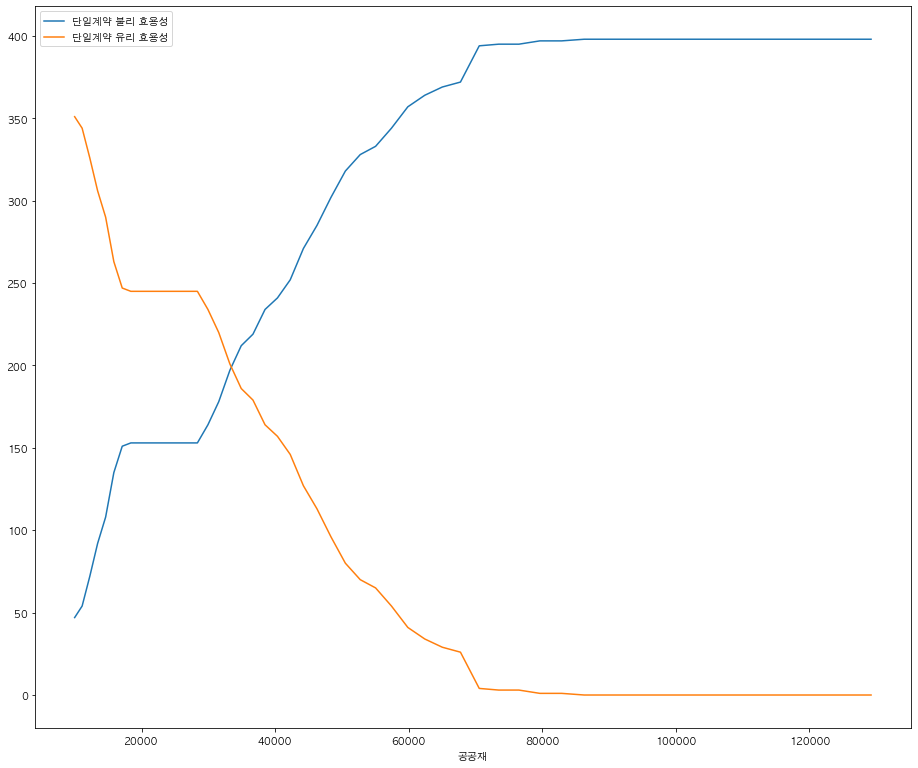

In [37]:
# 효용성 곡선
public_x = basic_report_df['PUBLIC METER'].values[:50]
prevail_comp_y = prevail_report_df['단일계약 불리(가구 수)'].values[:50]
prevail_single_y = prevail_report_df['단일계약 유리(가구 수)'].values[:50]

plt.plot(public_x, prevail_comp_y, label="단일계약 불리 효용성")
plt.plot(public_x, prevail_single_y, label="단일계약 유리 효용성")
plt.xlabel("공공재")
plt.legend()

plt.show()

- 전체 APT METER에서 공공재의 양이 증가할 수록, 단일계약 유리자들의 효용성은 감소한다.
- 반대로 단일계약 불리자들의 효용성은 증가한다.

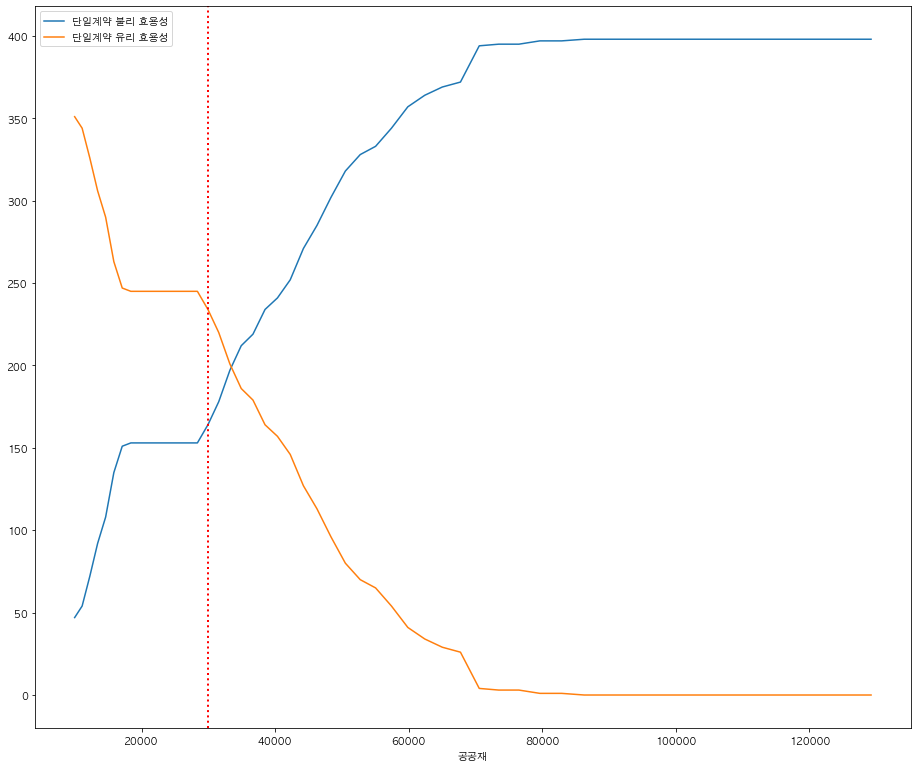

In [42]:
# 가격 비율
# 이번달은 25% 사용했어
SEL_PERCENTAGE = 25
prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]
sel_public_meter = basic_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['PUBLIC METER']

public_x = basic_report_df['PUBLIC METER'].values[:50]
prevail_comp_y = prevail_report_df['단일계약 불리(가구 수)'].values[:50]
prevail_single_y = prevail_report_df['단일계약 유리(가구 수)'].values[:50]

plt.plot(public_x, prevail_comp_y, label="단일계약 불리 효용성")
plt.plot(public_x, prevail_single_y, label="단일계약 유리 효용성")
plt.axvline(x=sel_public_meter, color='r', linestyle=':', linewidth=2)
plt.xlabel("공공재")
plt.legend()

plt.show()

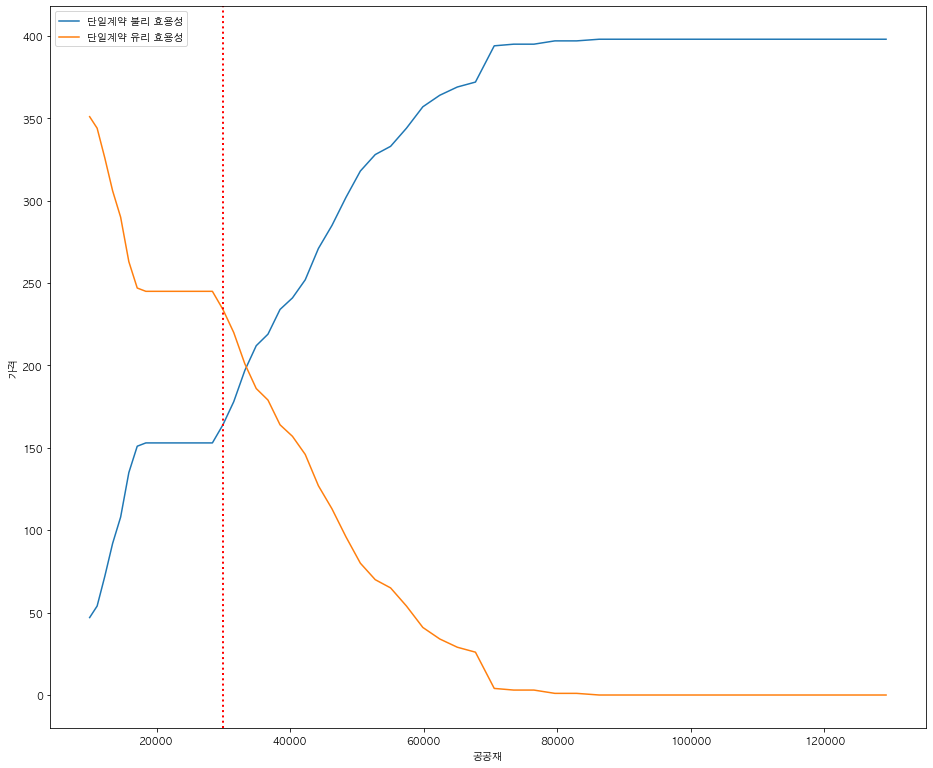

In [63]:
# 가격 비율
# 이번달은 25% 사용했어
SEL_PERCENTAGE = 25
prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]
sel_public_meter = basic_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['PUBLIC METER']

public_x = basic_report_df['PUBLIC METER'].values[:50]
prevail_comp_y = prevail_report_df['단일계약 불리(가구 수)'].values[:50]
prevail_single_y = prevail_report_df['단일계약 유리(가구 수)'].values[:50]

plt.plot(public_x, prevail_comp_y, label="단일계약 불리 효용성")
plt.plot(public_x, prevail_single_y, label="단일계약 유리 효용성")
plt.axvline(x=sel_public_meter, color='r', linestyle=':', linewidth=2)
plt.xlabel("공공재")
plt.ylabel("가격")
plt.legend()

plt.show()

household_length = prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['단일계약 불리(가구 수)'] + \
            prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['단일계약 유리(가구 수)']
comp_length = prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['단일계약 불리(가구 수)']
single_length = prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['단일계약 유리(가구 수)']

comp_rate = comp_length / household_length
single_rate = single_length / household_length

comp_price = round(basic_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['단일계약 공동설비요금'] * comp_rate * 0.1) * 10
single_price = basic_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['단일계약 공동설비요금'] - comp_price

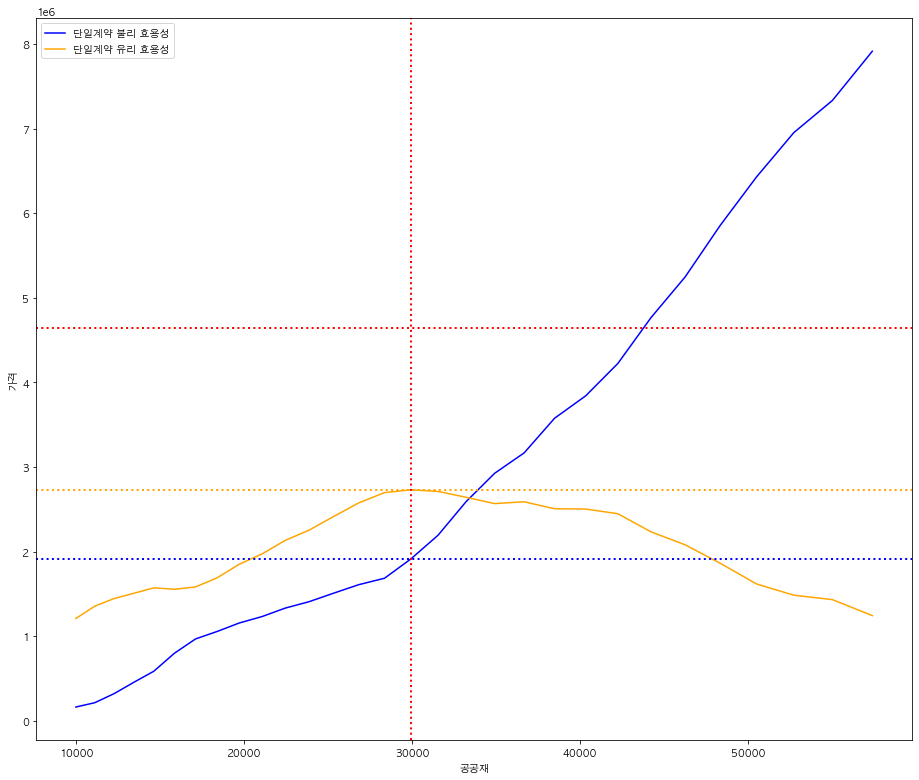

In [92]:
idxes = prevail_report_df.index[:30]
comp_price_y = list()
single_price_y = list()

for idx in idxes:    
    household_length = prevail_report_df.loc[idx]['단일계약 불리(가구 수)'] + \
                prevail_report_df.loc[idx]['단일계약 유리(가구 수)']
    comp_length = prevail_report_df.loc[idx]['단일계약 불리(가구 수)']
    single_length = prevail_report_df.loc[idx]['단일계약 유리(가구 수)']

    comp_rate = comp_length / household_length
    single_rate = single_length / household_length

    comp_price = round(basic_report_df.loc[idx]['단일계약 공동설비요금'] * comp_rate * 0.1) * 10
    single_price = basic_report_df.loc[idx]['단일계약 공동설비요금'] - comp_price
    
    comp_price_y.append(comp_price)
    single_price_y.append(single_price)
    
# 가격 비율
# 이번달은 25% 사용했어
SEL_PERCENTAGE = 25
prevail_report_df.loc['{}%'.format(SEL_PERCENTAGE)]
sel_public_meter = basic_report_df.loc['{}%'.format(SEL_PERCENTAGE)]['PUBLIC METER']

public_x = basic_report_df['PUBLIC METER'].values[:30]

plt.plot(public_x, comp_price_y, label="단일계약 불리 효용성", color='blue')
plt.plot(public_x, single_price_y, label="단일계약 유리 효용성", color='orange')
plt.axvline(x=sel_public_meter, color='r', linestyle=':', linewidth=2)
plt.xlabel("공공재")
plt.ylabel("가격")
plt.legend()

percentage_idx = list(idxes).index('{}%'.format(SEL_PERCENTAGE))
plt.axhline(y=comp_price_y[percentage_idx], linestyle=':',linewidth=2, color='blue')
plt.axhline(y=single_price_y[percentage_idx], linestyle=':', linewidth=2, color='orange')
plt.axhline(y=comp_price_y[percentage_idx] + single_price_y[percentage_idx], linestyle=':', linewidth=2, color='red')

plt.show()

In [114]:
basic_20_report_df = pd.DataFrame()
basic_report_dict = dict()

now_month = 6
ds = DPPSUPPORTER(datas=datas, now_month=now_month)

START_STEP = 25
PERCENTAGE_STEP = 1
LAST_STEP = 90
HOUSEHOLD_RATE = ds.sum_df.sum(axis=1)['kwh'] 
HOUSEHOLD_RATE_100 = HOUSEHOLD_RATE * 100

ds_households = []
ps_households = []

prevail_report_df = pd.DataFrame(
    columns=['종합계약 유리(평균 사용량)','종합계약 유리(가구 수)','종합계약 유리(평균 청구금액)', '종합계약 유리(평균 - 공동)'
             ,'종합계약 불리(평균 사용량)','종합계약 불리(가구 수)','종합계약 불리(평균 청구금액)', '종합계약 불리(평균 - 공동)', '종합계약 공동설비요금'
             ,'단일계약 유리(평균 사용량)','단일계약 유리(가구 수)', '단일계약 유리(평균 청구금액)', '단일계약 유리(평균 - 공동)'
             ,'단일계약 불리(평균 사용량)','단일계약 불리(가구 수)', '단일계약 불리(평균 청구금액)', '단일계약 불리(평균 - 공동)','단일계약 공동설비요금']
)

ds_first_index = None
ps_first_index = None
for PUBLIC_PERCENTAGE in range(START_STEP, LAST_STEP + PERCENTAGE_STEP, PERCENTAGE_STEP):
    ALL_RATE = round(HOUSEHOLD_RATE_100 / (100 - PUBLIC_PERCENTAGE))
    PUBLIC_RATE = ALL_RATE - HOUSEHOLD_RATE
    
    print("공용 사용량 차지비율: {}%\n".format(PUBLIC_PERCENTAGE) +\
     "세대 사용량 (kwh): {}\n".format(HOUSEHOLD_RATE) +\
     "공용 사용량 (kwh): {}\n".format(PUBLIC_RATE) +\
     "전체 사용량 (kwh): {}\n".format(ALL_RATE))
    
    comprehensive_households = ds.get_households(rate_type="종합계약")
    single_households = ds.get_households(rate_type="단일계약")

    comp_mgmt = MGMTOFFICE(rate_type="종합계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=comprehensive_households,
                      peak_df=ds.peak_df)
    single_mgmt = MGMTOFFICE(rate_type="단일계약", 
                      APT_METER=ALL_RATE, 
                      now_month=now_month,
                      households=single_households,
                      peak_df=ds.peak_df)
    
    comp_bill = comp_mgmt.bill()
    single_bill = single_mgmt.bill()
    
    prevail_comp = comp_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()
    disprevail_comp = comp_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    prevail_single = single_bill.loc[comp_bill['최종청구금액'] > single_bill['최종청구금액']].copy()
    disprevail_single = single_bill.loc[comp_bill['최종청구금액'] < single_bill['최종청구금액']].copy()

    if PUBLIC_PERCENTAGE == START_STEP:
        ds_first_index = prevail_comp.index
        ps_first_index = disprevail_comp.index
    # 손해액 계산 (내가 종합계약이었다면,)
    ds_households.append((prevail_comp.loc[ds_first_index] - disprevail_single)['최종청구금액'].mean())
    ps_households.append((disprevail_comp.loc[ps_first_index] - prevail_single)['최종청구금액'].mean())
    
    prevail_report_dict = dict()
    prevail_report_dict['종합계약 공동설비요금'] = comp_bill['공동전기사용료'][0]
    prevail_report_dict['종합계약 유리(가구 수)'] = len(prevail_comp)
    prevail_report_dict['종합계약 유리(평균 사용량)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 유리(평균 청구금액)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 유리(평균 - 공동)'] = 0 if len(prevail_comp) == 0 else round(prevail_comp['최종청구금액'].mean()) - prevail_comp['공동전기사용료'][0]
    prevail_report_dict['종합계약 불리(가구 수)'] = len(disprevail_comp)
    prevail_report_dict['종합계약 불리(평균 사용량)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['사용량 (kwh)'].mean())
    prevail_report_dict['종합계약 불리(평균 청구금액)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean())
    prevail_report_dict['종합계약 불리(평균 - 공동)'] = 0 if len(disprevail_comp) == 0 else round(disprevail_comp['최종청구금액'].mean()) - disprevail_comp['공동전기사용료'][0]

    prevail_report_dict['단일계약 공동설비요금'] = single_bill['공동전기사용료'][0]
    prevail_report_dict['단일계약 유리(가구 수)'] = len(prevail_single)
    prevail_report_dict['단일계약 유리(평균 사용량)'] = 0 if len(prevail_single) == 0 else round(prevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 유리(평균 청구금액)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 유리(평균 - 공동)'] = 0 if len(prevail_single) == 0 else round(prevail_single['최종청구금액'].mean()) - prevail_single['공동전기사용료'][0]
    
    prevail_report_dict['단일계약 불리(가구 수)'] = len(disprevail_single)
    prevail_report_dict['단일계약 불리(평균 사용량)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['사용량 (kwh)'].mean())
    prevail_report_dict['단일계약 불리(평균 청구금액)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean())
    prevail_report_dict['단일계약 불리(평균 - 공동)'] = 0 if len(disprevail_single) == 0 else round(disprevail_single['최종청구금액'].mean()) - disprevail_single['공동전기사용료'][0]
    
    prevail_report_df = prevail_report_df.append(
        pd.Series(
            prevail_report_dict,
            name="{}%".format(PUBLIC_PERCENTAGE)
        )
    )
    
    IPython.display.clear_output()

공용 사용량 차지비율: 26%
세대 사용량 (kwh): 89798.0
공용 사용량 (kwh): 31551.0
전체 사용량 (kwh): 121349

     type  max kWh basic    fee unit  season
0  주택용 저압    200.0   910   88.3  kWh  spring
1  주택용 저압    400.0  1600  182.9  kWh  spring
2  주택용 저압      inf  7300  275.6  kWh  spring
      type  max kWh basic    fee unit  season
12  주택용 고압    200.0   730   73.3  kWh  spring
13  주택용 고압    400.0  1260  142.3  kWh  spring
14  주택용 고압      inf  6060  210.6  kWh  spring


KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['아파트1-101-1202', '아파트1-102-1501', '아파트1-103-1306', '아파트1-103-1004',\n       '아파트1-103-1604',\n       ...\n       '아파트2-2-1010', '아파트3-101-806', '아파트3-101-1602', '아파트3-103-102',\n       '아파트3-103-701'],\n      dtype='object', length=14). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [104]:
prevail_report_df

,종합계약 유리(평균 사용량),종합계약 유리(가구 수),종합계약 유리(평균 청구금액),종합계약 유리(평균 - 공동),종합계약 불리(평균 사용량),종합계약 불리(가구 수),종합계약 불리(평균 청구금액),종합계약 불리(평균 - 공동),종합계약 공동설비요금,단일계약 유리(평균 사용량),단일계약 유리(가구 수),단일계약 유리(평균 청구금액),단일계약 유리(평균 - 공동),단일계약 불리(평균 사용량),단일계약 불리(가구 수),단일계약 불리(평균 청구금액),단일계약 불리(평균 - 공동),단일계약 공동설비요금
10%,90,47,8800,6111,244,351,34008,31319,2689,244,351,29187,25743,90,47,9368,5924,3444


In [112]:
len(ps_households)

66

/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/formegusto/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


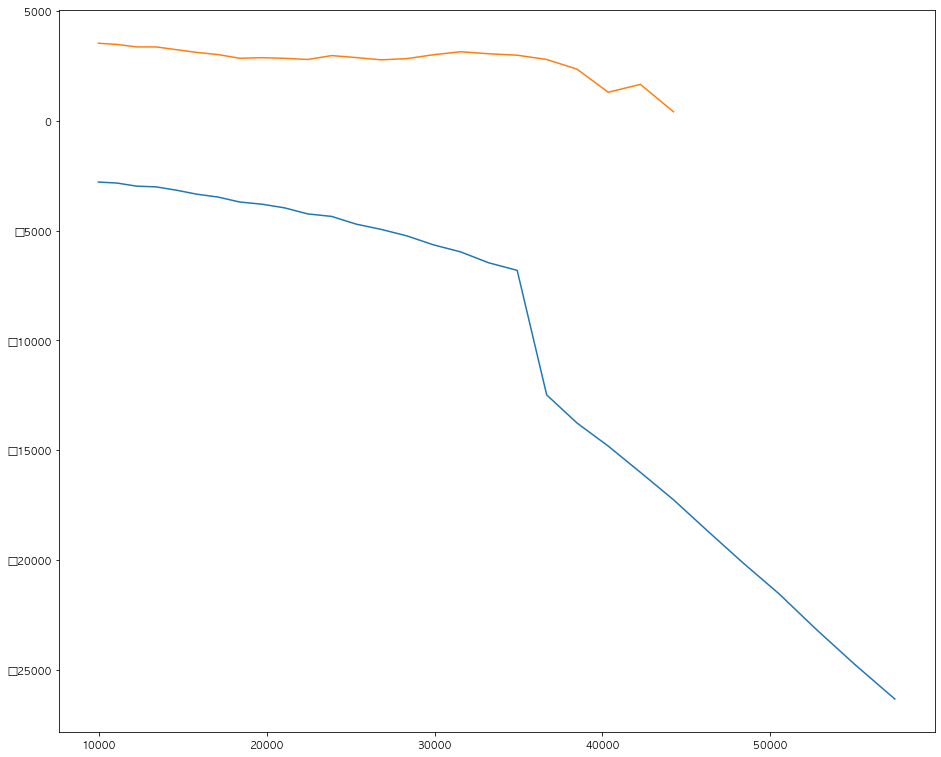

In [113]:

public_x = basic_report_df['PUBLIC METER'].values[:30]

plt.plot(public_x, ds_households[:30])
plt.plot(public_x, ps_households[:30])